In [1]:
from nuplan.database.nuplan_db_orm.nuplandb import NuPlanDB
from pathlib import Path
from nuplan.database.nuplan_db_orm.nuplandb_wrapper import NuPlanDBWrapper
from nuplan.database.nuplan_db_orm.frame import Frame
import os

from nuplan.planning.utils.multithreading.worker_pool import Task
from nuplan.planning.utils.multithreading.worker_parallel import SingleMachineParallelExecutor
from nuplan.planning.scenario_builder.scenario_filter import ScenarioFilter
from nuplan.planning.scenario_builder.nuplan_db.nuplan_scenario_builder import NuPlanScenarioBuilder
from nuplan.planning.scenario_builder.nuplan_db.nuplan_scenario_utils import ScenarioMapping

import os
import math
import argparse
import matplotlib.pyplot as plt
from tqdm import tqdm
from data_utils import *
from trajectory_tree_planner import *
from common_utils import get_filter_parameters, get_scenario_map
from data_process import DataProcessor

In [2]:
db_path = "/cailiu2/Diffusion-Planner/data/2021.10.21.14.43.30_veh-28_01244_01519.db" # single db file
db_path = "/share/data_cold/open_data/nuplan/data/cache/mini"  # multi db files
data_root = "/cailiu2/Diffusion-Planner/data/"
map_path = "/cailiu2/Diffusion-Planner/data/maps"
map_version = "nuplan-maps-v1.0"

save_processed_path = "/cailiu2/Diffusion-Planner/data/processed"

In [3]:
total_scenarios_num = 10
scenario_mapping = ScenarioMapping(scenario_map=get_scenario_map(), subsample_ratio_override=0.5)
builder = NuPlanScenarioBuilder(db_path, map_path, None, None, map_version, scenario_mapping=scenario_mapping)
scenario_filter = ScenarioFilter(*get_filter_parameters(
                                                        num_scenarios_per_type=30000,
                                                        limit_total_scenarios=total_scenarios_num))

print(scenario_filter) # note: the <scenario_types> in <scenario_filter> is the scenario types thich you want
worker = SingleMachineParallelExecutor(use_process_pool=True)
scenarios = builder.get_scenarios(scenario_filter, worker)
print(f"Total number of training scenarios: {len(scenarios)}")
del worker, builder, scenario_filter

ScenarioFilter(scenario_types=['starting_left_turn', 'starting_right_turn', 'starting_straight_traffic_light_intersection_traversal', 'high_lateral_acceleration', 'high_magnitude_speed', 'low_magnitude_speed', 'traversing_pickup_dropoff', 'near_multiple_vehicles', 'changing_lane', 'following_lane_with_lead'], scenario_tokens=None, log_names=None, map_names=None, num_scenarios_per_type=30000, limit_total_scenarios=10, timestamp_threshold_s=None, ego_displacement_minimum_m=None, expand_scenarios=False, remove_invalid_goals=False, shuffle=False, ego_start_speed_threshold=None, ego_stop_speed_threshold=None, speed_noise_tolerance=None, token_set_path=None, fraction_in_token_set_threshold=None, ego_route_radius=None)


Total number of training scenarios: 10


  0%|          | 0/10 [00:00<?, ?it/s]

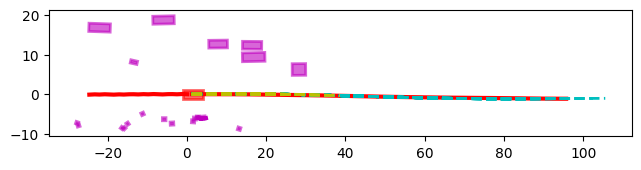

 10%|█         | 1/10 [00:07<01:04,  7.15s/it]

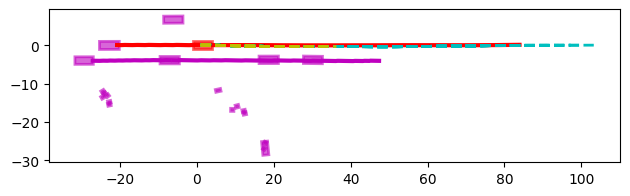

 20%|██        | 2/10 [00:12<00:50,  6.26s/it]

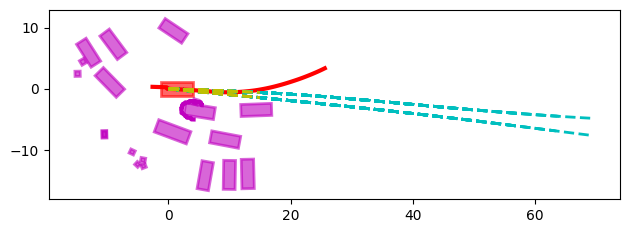

 30%|███       | 3/10 [00:17<00:39,  5.71s/it]

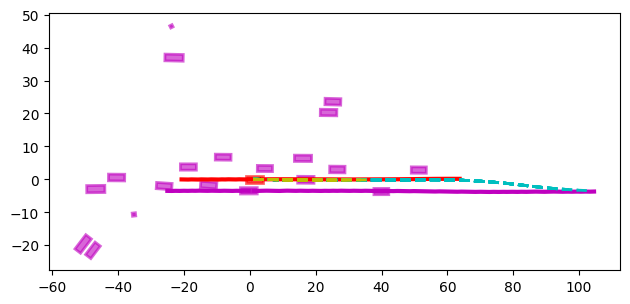

 40%|████      | 4/10 [00:22<00:31,  5.28s/it]

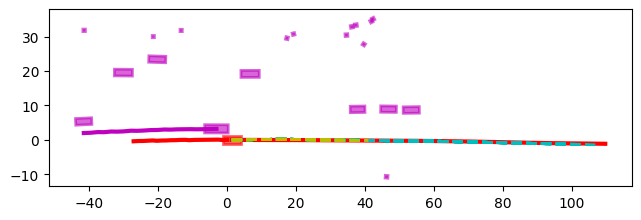

 50%|█████     | 5/10 [00:26<00:24,  4.84s/it]

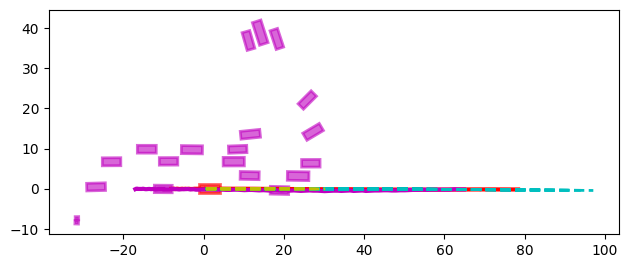

 60%|██████    | 6/10 [00:31<00:19,  4.89s/it]

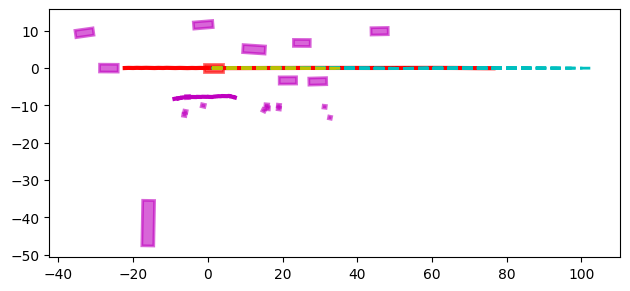

 70%|███████   | 7/10 [00:36<00:14,  4.95s/it]

 80%|████████  | 8/10 [00:40<00:09,  4.73s/it]

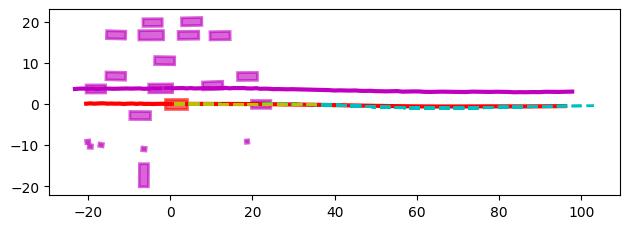

 90%|█████████ | 9/10 [00:46<00:04,  4.99s/it]

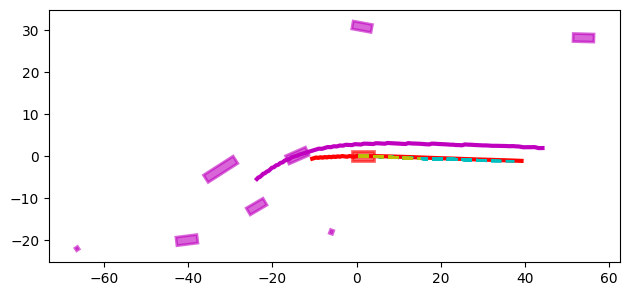

100%|██████████| 10/10 [00:50<00:00,  5.06s/it]


In [4]:
scenario_list = [scenario for scenario in scenarios[:10] ]
processor = DataProcessor(scenario_list)#extract the 0 scenarios
processor.work(save_processed_path, debug = True)